#Task 4: Predicting Insurance Claim Amounts

**Dependencies**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error

# OBJECTIVE

my objective is to predict insurance charges based on some personal details like age, BMI

In [ ]:
#uploding the csv
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


**loading the dataset**

In [ ]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Exploring the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
print(df.isnull().sum())  # null values
print({df.shape}) #shape of the dataset

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
{(1338, 7)}


**Descriptive statistics using describe function**

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#To check the datatypes of the features
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


#  Encode Categorical Variables

In [ ]:
#encoding columns using label encoder
le = LabelEncoder()
# Male=1, Female=0
df['sex'] = le.fit_transform(df['sex'])
# Yes=1, No=0
df['smoker'] = le.fit_transform(df['smoker'])
# Region labels: 0–3
df['region'] = le.fit_transform(df['region'])

#VISUALIZATION OF KEY FEATURES

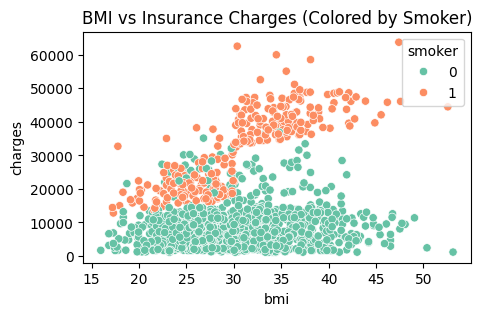

In [ ]:
plt.figure(figsize=(5,3))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', palette='Set2')
plt.title("BMI vs Insurance Charges (Colored by Smoker)")
plt.show()

This graph shows that smokers with higher BMI tend to have significantly higher insurance charges compared to non-smokers. The cost impact of BMI is much more severe for smokers.

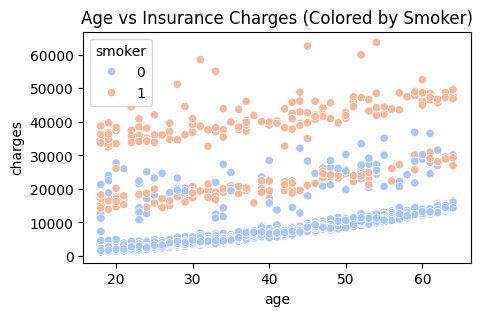

In [ ]:
plt.figure(figsize=(5,3))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', palette='coolwarm')
plt.title("Age vs Insurance Charges (Colored by Smoker)")
plt.show()


Insurance charges increase with age for all individuals, but the rise is much steeper for smokers. Older smokers pay the highest charges overall.



/tmp/ipython-input-24-1755621886.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='smoker', y='charges', palette='pastel')


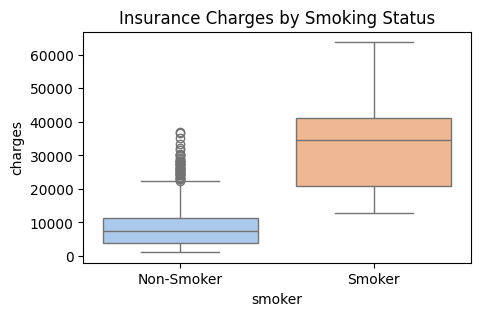

In [ ]:
plt.figure(figsize=(5,3))
sns.boxplot(data=df, x='smoker', y='charges', palette='pastel')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])
plt.title("Insurance Charges by Smoking Status")
plt.show()

Smokers have a much higher median and wider spread of charges than non-smokers, confirming that smoking is a major factor driving up insurance costs.

**heatmap for correlation**

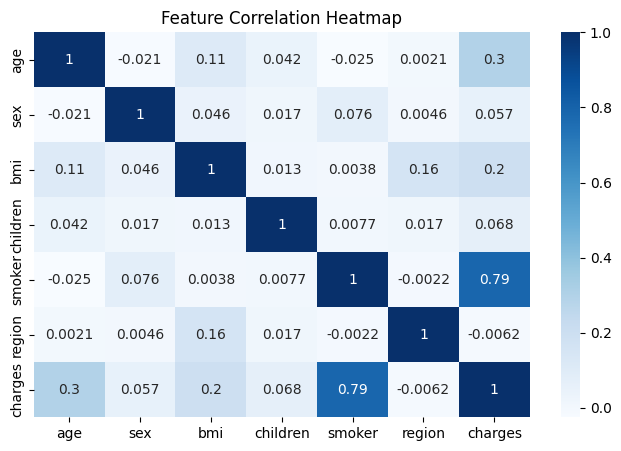

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title("Feature Correlation Heatmap")
plt.show()

# Separate dataframe into separate object Features and Target

In [ ]:
# Object for target variable
X = df.drop("charges", axis=1)
# object for input features
y = df["charges"]
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# MODEL TRANING WITH LINEAR REGRESSION

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting
y_pred = model.predict(X_test)


#  Evaluate model performance using MAE and RMSE

In [ ]:
#Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

#Calculate Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

#printing them
print(f"MAE =  {mae:.2f}")
print(f"RMSE = {rmse:.2f}")

MAE =  4186.51
RMSE = 5799.59


# CONCLUSION

The Linear Regression model predicted insurance charges with a MAE of 4186.51 and an RMSE of 5799.59, indicating moderate prediction error. Visual analysis showed that smoking, age, and BMI significantly influence charges, with smokers especially older or high BMI individuals incurring the highest costs. The model effectively highlights key factors affecting insurance pricing.